In [1]:
import cv2
import os
import numpy as np
from mtcnn import MTCNN
import dlib
import matplotlib.pyplot as plt
import tensorflow as tf
from keras_facenet import FaceNet

In [2]:
# Initialize MTCNN for face detection
mtcnn_detector = MTCNN()
enco = []
def detect_and_align_faces_mtcnn(image):
    detections = mtcnn_detector.detect_faces(image)
    face_chips = []
    for detection in detections:
        x, y, width, height = detection['box']
        x, y = abs(x), abs(y)
        face = image[y:y+height, x:x+width]
        face_resized = cv2.resize(face, (150, 150))  # Align face size to 150x150
        # face_resized = face_resized / 255.0
        face_chips.append(face_resized)
    return face_chips

In [3]:
def get_face_encodings(face_chips):
    embedder = FaceNet()
    encodings = []
    for face_chip in face_chips:
        face_chip = np.expand_dims(face_chip, axis=0)
        face_encoding = embedder.embeddings(face_chip)
        encodings.append(np.array(face_encoding))
        enco.append(np.array(face_encoding))
    return encodings

In [17]:
def load_and_process_images(directory):
    all_imgs = []
    all_encodings = []
    paths = []

    files = os.listdir(directory)
    
    for idx, filename in enumerate(files):
        path = os.path.join(directory, filename)
        img = cv2.imread(path)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        print(f"Processing image {idx+1}/{len(files)}: {filename}")

        face_chips = detect_and_align_faces_mtcnn(img_rgb)
        encodings = get_face_encodings(face_chips)
        
        if encodings:
            all_imgs.append(img)
            all_encodings.append(encodings)
            paths.append(path)
        else:
            print(f"No face encodings found for {filename}")

    return all_imgs, all_encodings, paths

In [33]:
def compare_faces(input_img_path, all_imgs, all_encodings, paths):
    matched_images = []
    
    # Load and process input image
    input_img = cv2.imread(input_img_path)
    input_img_rgb = cv2.cvtColor(input_img, cv2.COLOR_BGR2RGB)
    input_aligned_faces = detect_and_align_faces_mtcnn(input_img_rgb)
    input_face_encodings = get_face_encodings(input_aligned_faces)
    
    if not input_face_encodings:
        print("No face found in the input image.")
        return matched_images

    input_face_encoding = input_face_encodings[0]

    # Compare with dataset
    val = []
    for img, encodings, path in zip(all_imgs, all_encodings, paths):
        for encoding in encodings:
            distance = np.linalg.norm(encoding - input_face_encoding)
            val.append((distance, os.path.basename(path)))
            if distance < 0.9:  # Threshold for face recognition
                matched_images.append((img, path))  # Store encoding along with image path
                break

    # return matched_images
    return matched_images, val

In [19]:
# Load and extract faces from dataset
directory = 'lfw'
# For debugging, process only the first 10 images
# all_imgs, all_encodings, paths = load_and_process_images(directory, subset=10)
all_imgs, all_encodings, paths = load_and_process_images(directory)

Processing image 1/45: 1.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 226ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
Processing image 2/45: 10.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━

In [34]:
# Compare with an input image
# input_img_path = 'test\\pargg_test.jpg'
input_img_path = 'test\\test2.jpeg'
# input_img_path = 'test\\t4.jpeg'
matched_images, val = compare_faces(input_img_path, all_imgs, all_encodings, paths)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


In [35]:
val

[(1.2631967, '1.jpg'),
 (1.0936736, '1.jpg'),
 (1.2287914, '1.jpg'),
 (1.1187568, '1.jpg'),
 (1.1545963, '10.jpg'),
 (1.3929137, '10.jpg'),
 (1.2623492, '2.jpg'),
 (1.2310116, '2.jpg'),
 (1.2443234, '3.jpg'),
 (1.234211, '3.jpg'),
 (1.038989, '3.jpg'),
 (1.1400454, '3.jpg'),
 (1.3013471, '4.jpg'),
 (1.1359843, '4.jpg'),
 (1.3793023, '4.jpg'),
 (0.9943335, '4.jpg'),
 (1.2750517, '4.jpg'),
 (1.0359291, '5.jpg'),
 (1.2311293, '5.jpg'),
 (1.2284503, '5.jpg'),
 (1.3254924, '5.jpg'),
 (1.3991013, '5.jpg'),
 (1.2067705, '6.jpg'),
 (1.0645603, '6.jpg'),
 (1.3041562, '7.jpg'),
 (1.3534832, '7.jpg'),
 (1.2873435, '7.jpg'),
 (1.3687377, '7.jpg'),
 (1.1598121, '7.jpg'),
 (1.3070792, '7.jpg'),
 (1.2562168, '7.jpg'),
 (1.3414958, '8.jpg'),
 (1.2675487, '8.jpg'),
 (1.1663136, '8.jpg'),
 (1.2280047, '9.jpg'),
 (1.227571, '9.jpg'),
 (1.3152022, '9.jpg'),
 (1.1135656, '9.jpg'),
 (1.1802331, '9.jpg'),
 (1.101357, 'e1.jpeg'),
 (1.1793206, 'e1.jpeg'),
 (1.2138351, 'e1.jpeg'),
 (1.183854, 'e1.jpeg'),
 (1.03

In [36]:
len(matched_images)

13

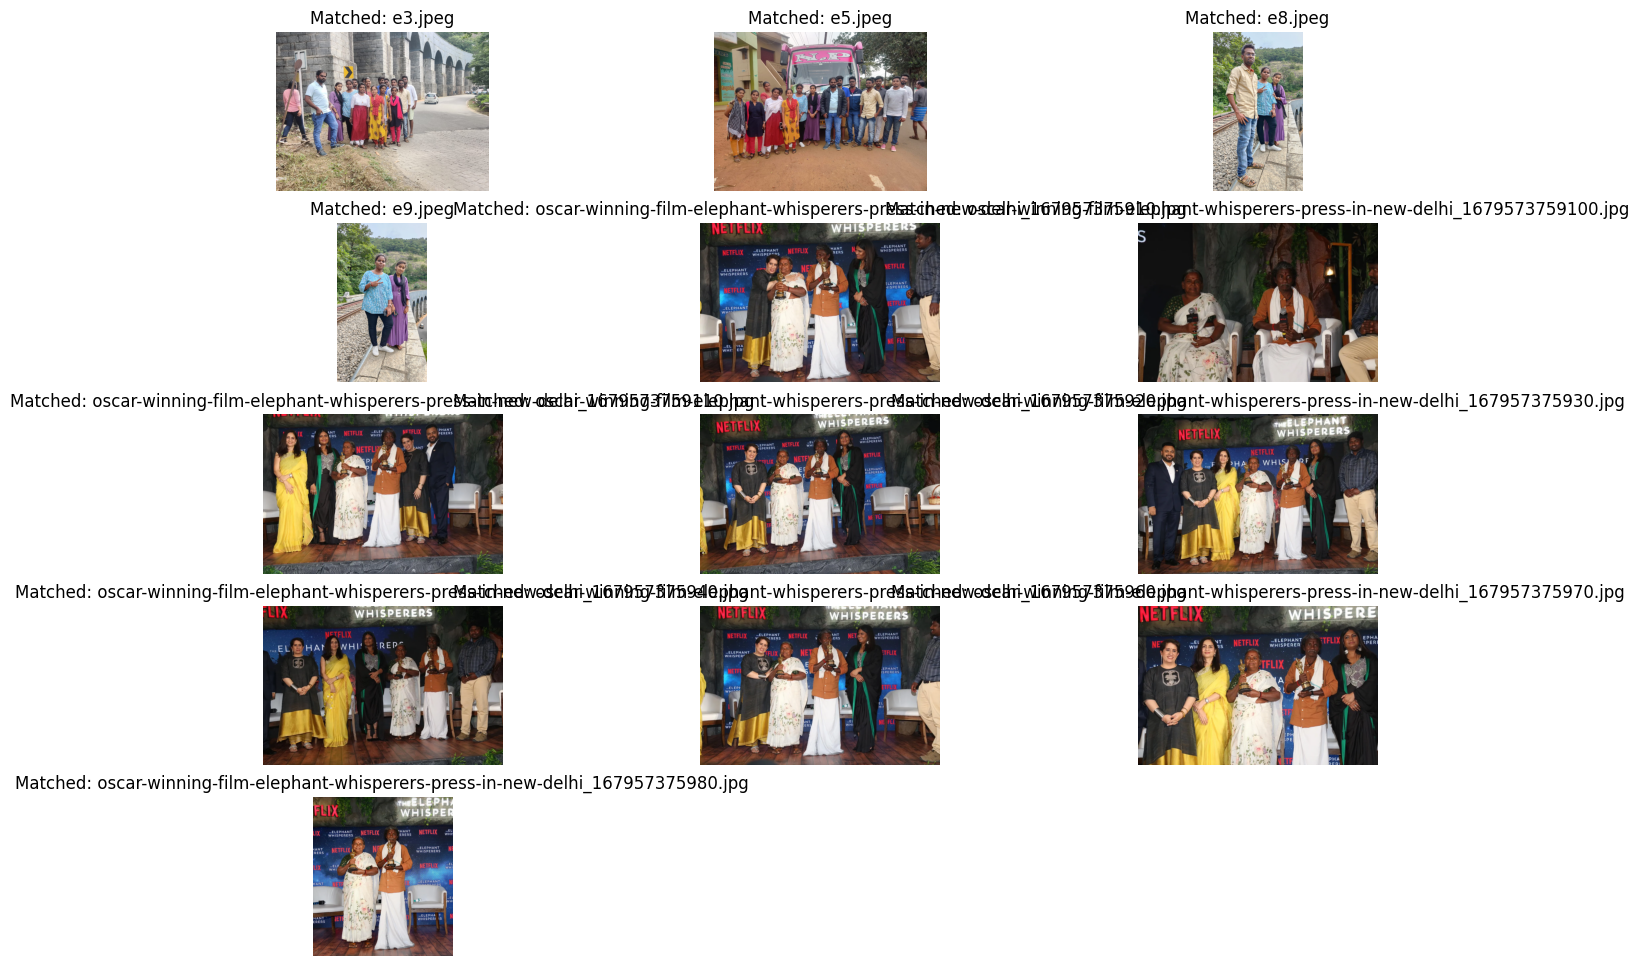

In [37]:
# Display matched images
plt.figure(figsize=(16, 12))
ncols = 3
nrows = len(matched_images) // ncols + (len(matched_images) % ncols != 0)

for i, (img, path) in enumerate(matched_images):
    plt.subplot(nrows, ncols, i + 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(f'Matched: {os.path.basename(path)}')
    plt.axis('off')